In [56]:
import pandas as pd

In [57]:

violations_df = pd.read_csv("violations.csv")
#violations_df = pd.read_csv("violations.csv", nrows=100)

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
# 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!

#3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.
col_types = { 'Plate ID': 'str'}
dof_violations_df = pd.read_csv("DOF_Parking_Violation_Codes.csv", dtype=col_types, parse_dates=True)
#dof_violations_df = pd.read_csv("DOF_Parking_Violation_Codes.csv", dtype=col_types, parse_dates=True, nrows=100)

In [59]:
# print(violations_df.columns)

In [60]:
# len(violations_df)

In [61]:
# print(dof_violations_df.head())

2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.

In [62]:
violations_df = violations_df[violations_df['Vehicle Year'] != 0]
# print(violations_df['Vehicle Year'].head())

4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.


In [63]:
# print(violations_df['Date First Observed'].head())

In [64]:
import datetime
violations_df.head()['Issue Date'].astype(datetime.datetime)

0    08/04/2013
1    08/04/2013
3    08/05/2013
4    08/08/2013
6    08/11/2013
Name: Issue Date, dtype: object

In [65]:
import datetime
violations_df.head()['Issue Date'].astype(datetime.datetime)

#violations_df['Issue Date'] = violations_df['Issue Date'].astype('datetime64[ns]')


0    08/04/2013
1    08/04/2013
3    08/05/2013
4    08/08/2013
6    08/11/2013
Name: Issue Date, dtype: object

In [66]:
# violations_df.dtypes

5. "Violation time" is... not a time. Make it a time.

In [67]:
import re
# violations_df['Violation Time'].head()

In [68]:
import numpy as np
# Build a function using that method
def time_to_datetime(str_time):
    try:
    #str_time = re.sub('^0', '', str_time)
        if isinstance(str_time, str):
            str_time = str_time + "M"
            #print("Trying to convert", str_time, "into a time")
            return datetime.datetime.strptime(str_time.strip(), "%I%M%p").time()
    #try:
     #   if str_time == -999:
      #      print("It's -999")
       #     return np.nan
    
    except:
        return np.nan

In [69]:

# Apply that method to the 'Time' column of the dataframe
violations_df['Violation Time'] = violations_df['Violation Time'].apply(time_to_datetime)

In [70]:
print(violations_df['Violation Time'].head())

0    07:52:00
1    12:40:00
3    14:32:00
4    12:39:00
6    19:41:00
Name: Violation Time, dtype: object


In [71]:
# def remove_1900(year):
#     year = str(year)
#     year = re.sub('^1900-01-01', '', year)
#     return year

# print(violations_df['Violation Time'].apply(remove_1900))

6.  There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [72]:
import re

In [73]:
def vehicle_colors(vehicle):
    if isinstance(vehicle, str):
        #print(vehicle)
        vehicle = re.sub('^GY$', 'GREY', vehicle)
        #vehicle = vehicle.replace("GY", "GREY")
        vehicle = re.sub('^WH$', 'WHITE', vehicle)
        vehicle = re.sub('^BR$', 'BROWN', vehicle)
        vehicle = re.sub('^RD$', 'RED', vehicle)
        vehicle = re.sub('^B[LK]$', 'BLACK', vehicle)
        vehicle = re.sub('^TN$', 'TAN', vehicle)
        vehicle = re.sub('^YW$', 'YELLOW', vehicle)
        vehicle = re.sub('^SIL$', 'SILVER', vehicle)
        vehicle = re.sub('^GR$', 'GREEN', vehicle)
        vehicle = re.sub('^SILVE$', 'SILVER', vehicle)
       
       
        
#         vehicle = vehicle.replace("WH","WHITE")
#         vehicle = vehicle.replace("BR","BROWN")
#         vehicle = vehicle.replace("RD","RED")
#         vehicle = vehicle.replace("BL","BLACK")
#         vehicle = vehicle.replace("BK","BLACK")
#         vehicle = vehicle.replace("TN","TAN")
#         vehicle = vehicle.replace("YW","YELLOW")
#         vehicle = re.sub('SIL$', 'SILVER', vehicle)
#         vehicle = vehicle.replace("SILVR","SILVER")
#         vehicle = vehicle.replace("SIL","SILVER")
    return vehicle

violations_df['Vehicle Color'] = violations_df['Vehicle Color'].apply(vehicle_colors)

In [74]:
violations_df['Vehicle Color'].head()

0     GREY
1    WHITE
3    WHITE
4    BROWN
6       GN
Name: Vehicle Color, dtype: object

7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [75]:
print(violations_df.columns)
violations_df['Violation Code'].head()

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')


0    46
1    46
3    46
4    41
6    14
Name: Violation Code, dtype: int64

In [76]:
violations_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GREY,0.0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WHITE,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WHITE,0.0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BROWN,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0.0,2011,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0.0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0.0,2005,-,0,NaN,NaN,NaN,NaN,NaN
10,1283983679,M367CN,NY,PAS,07/18/2013,24,SDN,HYUND,H,0,...,BLUE,0.0,2010,-,0,NaN,NaN,NaN,NaN,NaN
11,1283983734,GAR6813,NY,PAS,07/18/2013,24,SDN,TOYOT,H,0,...,TAN,0.0,1998,-,0,NaN,NaN,NaN,NaN,NaN
13,1283983825,GAC2703,NY,PAS,08/12/2013,24,SDN,NISSA,X,23230,...,WHITE,0.0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [77]:
print(dof_violations_df.columns)
dof_violations_df['CODE'].head()

Index(['CODE', 'DEFINITION', 'Manhattan  96th St. & below', 'All Other Areas'], dtype='object')


0    10
1    11
2    12
3    13
4    14
Name: CODE, dtype: object

In [78]:
# violations_df.merge(dof_violations_df, left_on='Violation Code', right_on='CODE')

In [79]:
#print(dof_violations_df['CODE'][0])
#test = dof_violations_df['CODE'][0]

def to_int(test):
    try:
        # test = re.sub('$', '', test)
        test = test.strip("$")
        #print(test)
        test = int(test)
        #print(test, " is now an int")
        return test
    except:
        print(test, " coult not be converted to an int")
        return np.nan

In [80]:
dof_violations_df['CODE'] = dof_violations_df['CODE'].apply(to_int)

37-38  coult not be converted to an int


7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [81]:
violations_df = violations_df.merge(dof_violations_df, left_on='Violation Code', right_on='CODE')

8. How much money did NYC make off of parking violations?

In [82]:
violations_df.describe()

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Date First Observed,Law Section,Unregistered Vehicle?,Vehicle Year,Feet From Curb,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE
count,2.825496e+06,2.825496e+06,2.825496e+06,2.825496e+06,2.825496e+06,2.825496e+06,2.487480e+06,2.825496e+06,2.825496e+06,2.825496e+06,2.825496e+06,2.825496e+06,497661.0,2.825496e+06,2.825496e+06,0.0,0.0,0.0,2.825496e+06
mean,6.111876e+09,3.429054e+01,2.609612e+04,2.196143e+04,2.229615e+04,2.163260e+07,5.538809e+01,4.876197e+01,5.701536e+01,4.014728e+05,3.799575e+05,4.905411e+02,0.0,2.006160e+03,1.829020e-01,NaN,NaN,NaN,3.429054e+01
std,2.374995e+09,2.383609e+01,2.200103e+04,2.193317e+04,2.208272e+04,1.873390e+07,3.879034e+01,4.059292e+01,7.402409e+01,2.551693e+05,2.739527e+06,2.263037e+02,0.0,5.899292e+00,1.083160e+00,NaN,NaN,NaN,2.383609e+01
min,1.001794e+09,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.080000e+02,0.0,1.970000e+03,0.000000e+00,NaN,NaN,NaN,4.000000e+00
25%,5.071069e+09,1.600000e+01,1.009000e+04,0.000000e+00,0.000000e+00,2.013123e+07,NaN,1.400000e+01,1.400000e+01,3.462040e+05,0.000000e+00,4.080000e+02,NaN,2.003000e+03,0.000000e+00,NaN,NaN,NaN,1.600000e+01
50%,7.233494e+09,2.100000e+01,2.053000e+04,1.571000e+04,1.684000e+04,2.014083e+07,NaN,4.300000e+01,4.300000e+01,3.556270e+05,0.000000e+00,4.080000e+02,NaN,2.007000e+03,0.000000e+00,NaN,NaN,NaN,2.100000e+01
75%,7.710377e+09,4.800000e+01,3.601000e+04,3.469000e+04,3.487000e+04,2.015050e+07,NaN,8.400000e+01,9.000000e+01,3.585650e+05,0.000000e+00,4.080000e+02,NaN,2.011000e+03,0.000000e+00,NaN,NaN,NaN,4.800000e+01
max,7.999972e+09,9.900000e+01,9.802000e+04,9.831000e+04,9.826000e+04,8.888889e+07,9.850000e+02,9.850000e+02,9.930000e+02,9.999940e+05,2.031091e+07,1.111000e+03,0.0,2.069000e+03,1.500000e+01,NaN,NaN,NaN,9.900000e+01


In [83]:
violations_df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

In [84]:
violations_df['Summons Number']

0          1283294138
1          1283294151
2          1283294175
3          1290834349
4          1293030739
5          1293100924
6          1293525625
7          1302446484
8          1306112679
9          1306114172
10         1306114184
11         1306114196
12         1306116235
13         1306206844
14         1307452577
15         1307452590
16         1321774722
17         1321774771
18         1321965783
19         1325733878
20         1325972393
21         1326475710
22         1295546516
23         1295547089
24         1295548562
25         1295548574
26         1295549232
27         1295550374
28         1295551070
29         1295571900
              ...    
2825466    1360267487
2825467    1354469525
2825468    1354489354
2825469    1354461071
2825470    1360225274
2825471    1361800732
2825472    7809745141
2825473    1364666613
2825474    1364670458
2825475    1355321086
2825476    1364675171
2825477    1364675183
2825478    1364680221
2825479    1364680233
2825480   

In [85]:
violations_df['Manhattan\xa0 96th St. & below']

0          $115 
1          $115 
2          $115 
3          $115 
4          $115 
5          $115 
6          $115 
7          $115 
8          $115 
9          $115 
10         $115 
11         $115 
12         $115 
13         $115 
14         $115 
15         $115 
16         $115 
17         $115 
18         $115 
19         $115 
20         $115 
21         $115 
22         $115 
23         $115 
24         $115 
25         $115 
26         $115 
27         $115 
28         $115 
29         $115 
           ...  
2825466     $65 
2825467     $65 
2825468     $65 
2825469     $65 
2825470     $65 
2825471     $65 
2825472     $65 
2825473     $65 
2825474     $65 
2825475     $65 
2825476     $65 
2825477     $65 
2825478     $65 
2825479     $65 
2825480     $65 
2825481     $65 
2825482     $65 
2825483     $65 
2825484     $65 
2825485     $65 
2825486     $65 
2825487     $65 
2825488     $65 
2825489     $65 
2825490     $65 
2825491     $65 
2825492     $65 
2825493     $6

In [86]:
violations_df['Manhattan\xa0 96th St. & below'] = violations_df['Manhattan\xa0 96th St. & below'].apply(to_int)

vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be conver

In [87]:
violations_df['Manhattan\xa0 96th St. & below'].sum()

238645680.0

In [88]:
violations_df['All Other Areas'] = violations_df['All Other Areas'].apply(to_int)

vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be converted to an int
vary  coult not be conver

In [89]:
violations_df['All Other Areas'].sum()

225973660.0

In [90]:
violations_df['Manhattan\xa0 96th St. & below'].describe()

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    2.821791e+06
mean     8.457242e+01
std      2.628204e+01
min      5.000000e+01
25%               NaN
50%               NaN
75%               NaN
max      1.800000e+02
Name: Manhattan  96th St. & below, dtype: float64

9. What's the most lucrative kind of parking violation? Below lists all the ones that chaarge $115, which is the highest amount

In [91]:
violations_df.groupby('CODE')['All Other Areas'].mean().sort_values(ascending=False).head(8)

CODE
27.0    180.0
67.0    165.0
31.0    115.0
56.0    115.0
55.0    115.0
53.0    115.0
51.0    115.0
50.0    115.0
Name: All Other Areas, dtype: float64

The most frequent parking violation is:

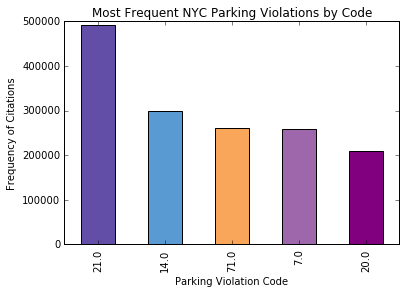

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
freqNYviolations = violations_df.groupby('CODE')['All Other Areas'].count().sort_values(ascending=False).head().plot(kind="bar", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
freqNYviolations.set_title('Most Frequent NYC Parking Violations by Code')
freqNYviolations.set_xlabel('Parking Violation Code')
freqNYviolations.set_ylabel('Frequency of Citations')
plt.savefig('freqParkingViolations.png')

In [93]:
violations_df.groupby('CODE')['All Other Areas'].count().sort_values(ascending=False).head(1)

CODE
21.0    491678
Name: All Other Areas, dtype: int64

In [94]:
# violations_df.sort_values('All Other Areas', ascending=False)

10. New Jersey has bad drivers, but does it have bad parkers, too?

In [95]:
nj_violations_df = violations_df[violations_df['Registration State'] != 'NJ']

print("There were", len(nj_violations_df['All Other Areas']), "parking violations in NYC by drivers registered in New Jersey")
print("These violations totaled", nj_violations_df['All Other Areas'].sum(), "of revenue")

There were 2798930 parking violations in NYC by drivers registered in New Jersey
These violations totaled 224047785.0 of revenue


 How much money does NYC make off of all non-New York vehicles?
11. Make a chart of the top few.

In [96]:
violations_df.groupby('Registration State')['All Other Areas'].sum().sort_values(ascending=False).head(8)

Registration State
NY    220522475.0
NJ      1925875.0
99       940475.0
PA       618715.0
CT       419355.0
FL       263780.0
MA       163455.0
VA       162475.0
Name: All Other Areas, dtype: float64

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


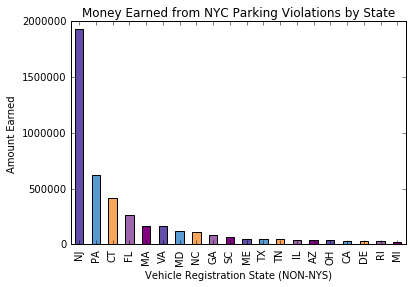

In [97]:

import matplotlib.pyplot as plt
%matplotlib inline

nonny_violations_df = violations_df[violations_df['Registration State'] != 'NY']
nonny_violations_df = nonny_violations_df[violations_df['Registration State'] != '99']
nonNYviolations = nonny_violations_df.groupby('Registration State')['All Other Areas'].sum().sort_values(ascending=False).head(20).plot(kind="bar", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
nonNYviolations.set_title('Money Earned from NYC Parking Violations by State')
nonNYviolations.set_xlabel('Vehicle Registration State (NON-NYS)')
nonNYviolations.set_ylabel('Amount Earned')
plt.savefig('nonNYParkingViolations.png')

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


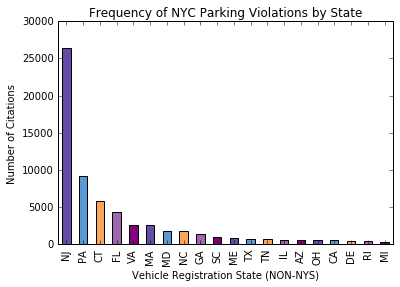

In [98]:

import matplotlib.pyplot as plt
%matplotlib inline

nonny_violations_df = violations_df[violations_df['Registration State'] != 'NY']
nonny_violations_df = nonny_violations_df[violations_df['Registration State'] != '99']
freqnonNYviolations = nonny_violations_df.groupby('Registration State')['All Other Areas'].count().sort_values(ascending=False).head(20).plot(kind="bar", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
freqnonNYviolations.set_title('Frequency of NYC Parking Violations by State')
freqnonNYviolations.set_xlabel('Vehicle Registration State (NON-NYS)')
freqnonNYviolations.set_ylabel('Number of Citations')
plt.savefig('freqnonNYParkingViolations.png')


12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.


13. What's the average ticket cost in NYC?


In [99]:
print("The average ticket cost in NYC is $", violations_df['All Other Areas'].mean())

The average ticket cost in NYC is $ 80.08700731


14. Make a graph of the number of tickets per day.


In [100]:
violations_df.groupby('Issue Date')['All Other Areas'].count().sort_values(ascending=False)

Issue Date
11/29/2013    27102
10/03/2013    24266
10/08/2013    24172
10/01/2013    23975
10/04/2013    22749
11/14/2013    22444
11/08/2013    22172
01/09/2014    22120
08/06/2013    22068
09/03/2013    22059
10/18/2013    21946
09/17/2013    21818
10/24/2013    21704
10/22/2013    21683
10/10/2013    21661
10/29/2013    21528
08/02/2013    21492
11/15/2013    21479
09/13/2013    21390
09/10/2013    21290
10/11/2013    21274
07/30/2013    21232
11/19/2013    21202
11/07/2013    21174
10/09/2013    21121
10/02/2013    21019
08/27/2013    20874
08/01/2013    20781
09/12/2013    20698
09/04/2013    20688
              ...  
08/01/2015        1
11/01/2012        1
08/01/2031        1
10/31/2043        1
08/06/2008        1
08/06/2004        1
08/06/2003        1
08/05/2017        1
08/05/2016        1
08/05/2014        1
08/05/2012        1
08/04/2044        1
08/04/2017        1
11/01/2011        1
01/01/1981        1
08/04/2003        1
08/03/2041        1
08/03/2016        1
11/01/202

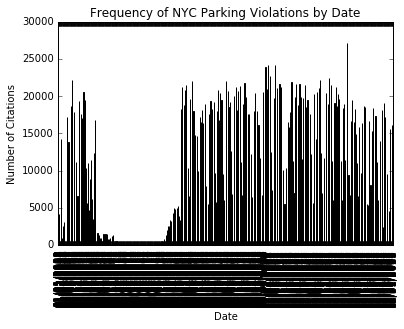

In [101]:

freqnonNYviolations = violations_df.groupby('Issue Date')['All Other Areas'].count().plot(kind="bar", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
freqnonNYviolations.set_title('Frequency of NYC Parking Violations by Date')
freqnonNYviolations.set_xlabel('Date')
freqnonNYviolations.set_ylabel('Number of Citations')
plt.savefig('datedfreqnonNYParkingViolations.png')

15. Make a graph of the amount of revenue collected per day.


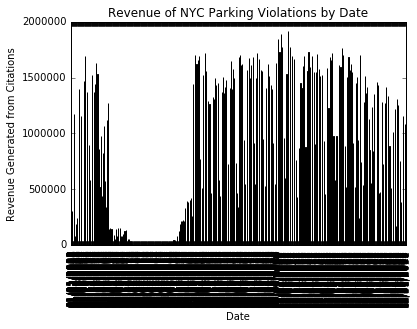

In [102]:

freqnonNYviolations = violations_df.groupby('Issue Date')['All Other Areas'].sum().plot(kind="bar", color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'])
freqnonNYviolations.set_title('Revenue of NYC Parking Violations by Date')
freqnonNYviolations.set_xlabel('Date')
freqnonNYviolations.set_ylabel('Revenue Generated from Citations')
plt.savefig('datedrevenueonNYParkingViolations.png')

16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.

17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!